In [ ]:
import pandas as pd
import seaborn as sns

df_treatment = pd.read_excel('reason_no_treatment.xlsx')

df_treatment = df_treatment.iloc[:, [0, 6]]
df_treatment = df_treatment.iloc[1:, :]

df_treatment.columns = ['reason', 'didnt_seek_treatment']

df_treatment.fillna(0)

FileNotFoundError: [Errno 2] No such file or directory: 'reason_no_treatment.xlsx'

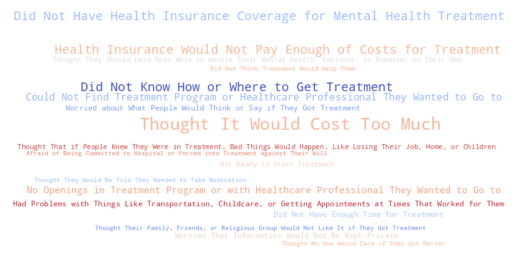

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = df_treatment['reason'].value_counts().to_dict()
word_cloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='coolwarm').generate_from_frequencies(words)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='didnt_seek_treatment23', ylabel='reason'>

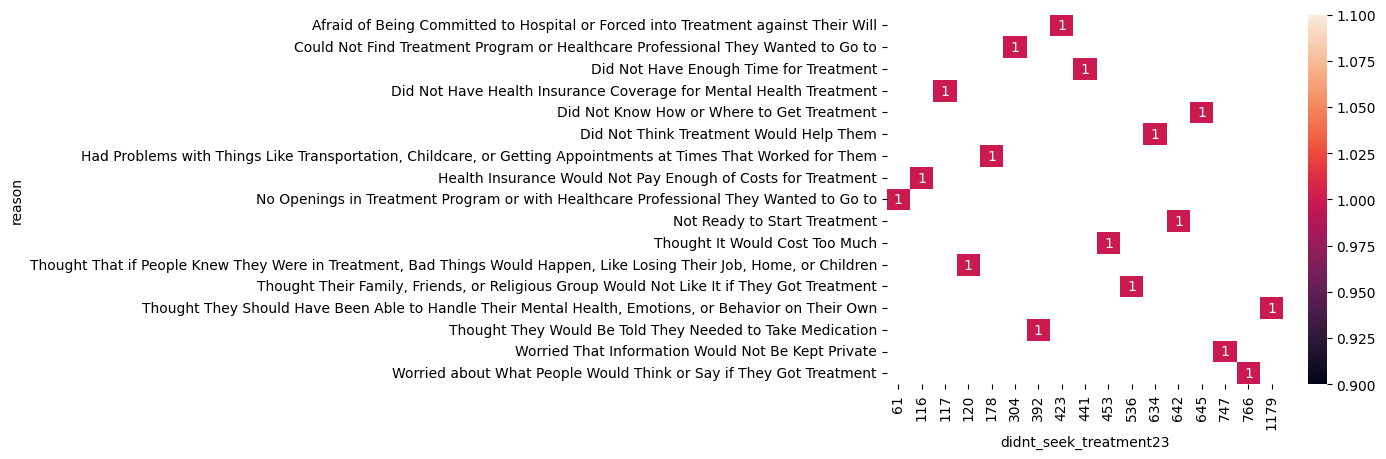

In [ ]:
heatmap_df = df_treatment.groupby('reason').value_counts().unstack()
sns.heatmap(heatmap_df, annot=True)

<ipython-input-60-b10c4de28396>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_sorted, x = 'didnt_seek_treatment', y = 'reason', palette="mako")


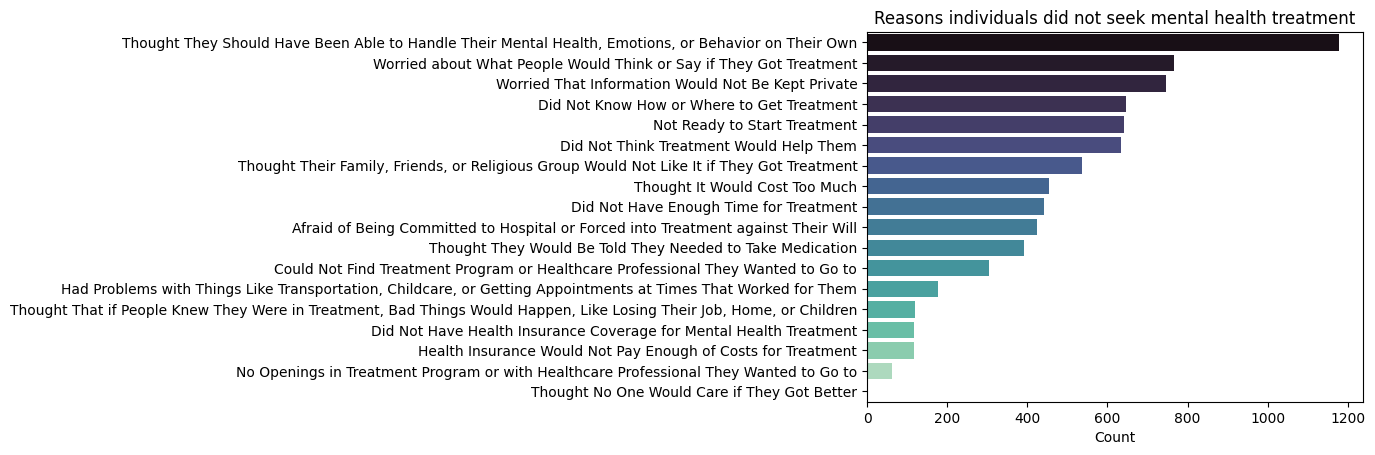

In [ ]:
df_sorted = df_treatment.sort_values(by="didnt_seek_treatment", ascending=False)
ax = sns.barplot(data = df_sorted, x = 'didnt_seek_treatment', y = 'reason', palette="mako")
plt.title("Reasons individuals did not seek mental health treatment")
ax.set_xlabel("Count")
ax.set_ylabel("")
plt.show()

In [ ]:
df_abuse = pd.read_excel('substance_or_mental_health_issue.xlsx')
df_abuse

df_abuse.columns = ['demographic', 'substance_problem22', 'substance_problem23', 'mental_problem22', 'mental_problem23']

df_abuse = df_abuse.iloc[11:18, :]

df_abuse.replace('*', 0, inplace=True)
df_abuse.replace('14.7a', 14.7, inplace=True)

df_abuse

pd.to_numeric(df_abuse['substance_problem22'])
pd.to_numeric(df_abuse['substance_problem23'])
pd.to_numeric(df_abuse['mental_problem22'])
pd.to_numeric(df_abuse['mental_problem23'])

df_abuse

#print(df_abuse.dtypes)

<ipython-input-5-b705a84069bd>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_abuse.replace('*', 0, inplace=True)
<ipython-input-5-b705a84069bd>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_abuse.replace('14.7a', 14.7, inplace=True)


,demographic,substance_problem22,substance_problem23,mental_problem22,mental_problem23
11,Not Hispanic or Latino,12.4,12.9,25.7,26.5
12,AIAN,17.6,18.6,19.6,27.8
13,Asian,3.7,3.9,15.8,15.6
14,Black or African American,7.2,6.7,16.0,16.1
15,NHOPI,8.2,0.0,0.0,0.0
16,White,14.1,14.7,28.4,29.3
17,Two or More Races,14.7,19.8,33.9,38.4


In [ ]:
summary_stats = df_abuse.describe()
print(summary_stats)

       substance_problem22  substance_problem23  mental_problem22  \
count             7.000000             7.000000          7.000000   
mean             11.128571            10.942857         19.914286   
std               4.903643             7.553996         11.030326   
min               3.700000             0.000000          0.000000   
25%               7.700000             5.300000         15.900000   
50%              12.400000            12.900000         19.600000   
75%              14.400000            16.650000         27.050000   
max              17.600000            19.800000         33.900000   

       mental_problem23  
count          7.000000  
mean          21.957143  
std           12.489310  
min            0.000000  
25%           15.850000  
50%           26.500000  
75%           28.550000  
max           38.400000  


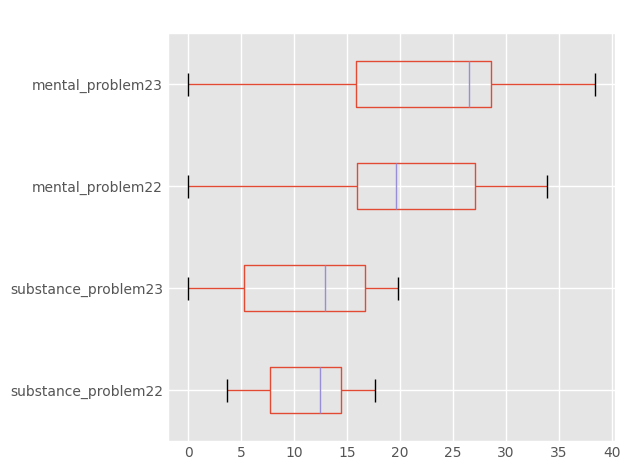

In [ ]:
plt.style.use('ggplot')
ax = df_abuse.boxplot(vert=False)
plt.title('Summary Statistics')
plt.tight_layout()
plt.show()


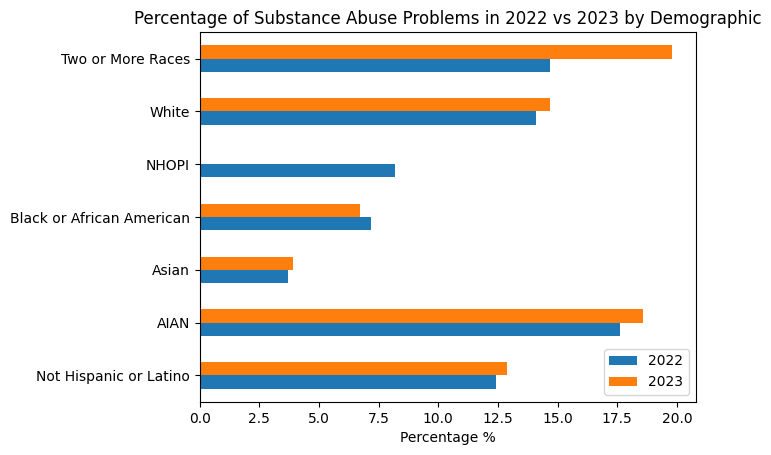

In [ ]:
df_abuse.plot(
    x="demographic", y=["substance_problem22", "substance_problem23"], kind="barh"
)
plt.title("Percentage of Substance Abuse Problems in 2022 vs 2023 by Demographic")
plt.xlabel("Percentage %")
plt.ylabel("")
legend = plt.legend()
legend.get_texts()[0].set_text('2022')
legend.get_texts()[1].set_text('2023')

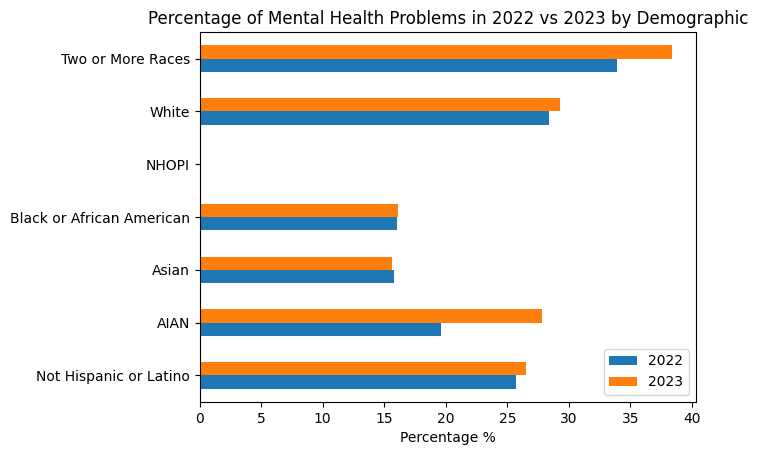

In [ ]:
df_abuse.plot(
    x="demographic", y=["mental_problem22", "mental_problem23"], kind="barh"
)

plt.title("Percentage of Mental Health Problems in 2022 vs 2023 by Demographic")
plt.xlabel("Percentage %")
plt.ylabel("")
legend = plt.legend()
legend.get_texts()[0].set_text('2022')
legend.get_texts()[1].set_text('2023')